```
above:     255 0   0   (red)
dermis:    0   0   255 (blue)
epidermis: 0   255 0   (green)
lesion:    255 255 255 (white)
subcutis:  0   0   0   (black)
```

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


In [ ]:
no_style_transfer = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/outputs/masks'
style_transfer = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/style transfer outputs/masks'
output_dir = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/Dolgozat/mask_pictures'

In [ ]:
classes = {'above': [255,0,0], 
           'dermis': [0,0,255], 
           'epidermis':[0,255,0], 
           'lesion': [255,255,255]}

#One image

In [ ]:
img_to_draw = 'ss_4_UNKNOWN'

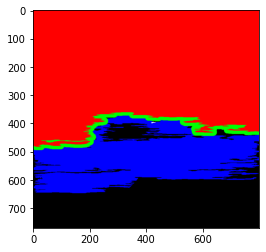

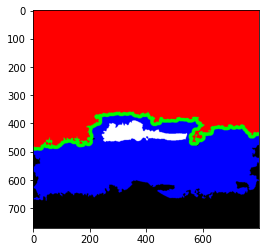

In [ ]:
i=0
for dir in [no_style_transfer, style_transfer]:
  all_masks = os.listdir(dir)
  mask_names = [m for m in all_masks if m.startswith(img_to_draw+'_mask_')]
  mask_names.sort()
  #print(mask_names)
  output_img = np.zeros((512,512,3),dtype='uint8') 
  for f in mask_names:
    mask_file = open(os.path.join(dir,f),'rb')
    mask = pickle.load(mask_file)
    mask_file.close()
    
    h,w = mask.shape
    if output_img.shape[0]!=h or output_img.shape[1]!=w:
      output_img.resize((h,w,3))
      #print('resizing')
    idx = f.find('mask')
    mask_type = f[idx+5:]
    if mask_type=='skin':
      continue
    """
    plt.figure()
    plt.imshow(mask)
    plt.title(mask_type)
    """
    color = classes.get(mask_type)
    #print(mask_type)
    for y in range(h):
      for x in range(w):
        if mask[y,x]:# and not output_img[y,x,:].any():
          output_img[y,x,:]=color
  plt.figure()
  plt.imshow(output_img)     
  output_img=cv2.cvtColor(output_img,cv2.COLOR_BGR2RGB)
  if i==0:
    img_name = img_to_draw
  else:
    img_name = img_to_draw+'_style_transfer'
  cv2.imwrite(os.path.join(output_dir,img_name+'.png'),output_img)
  i+=1


#More images

In [ ]:
input_dir = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/style_transfer_700_0.5M_outputs/masks'
output_dir = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/style_transfer_700_0.5M_outputs/mask pictures'
main_folder = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities/style_transfer_700_0.5M_images'

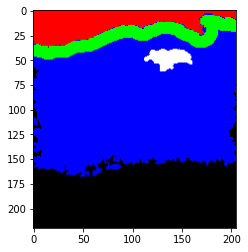

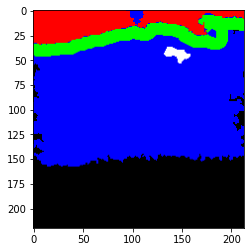

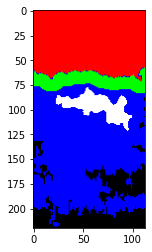

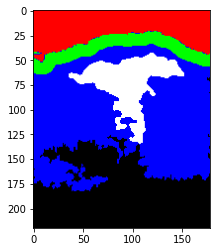

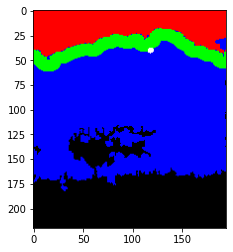

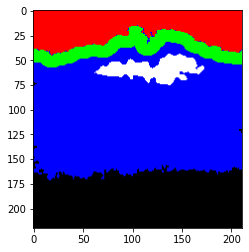

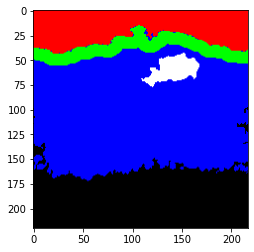

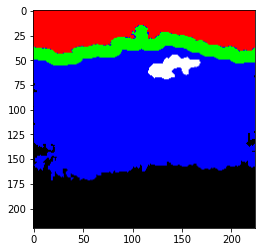

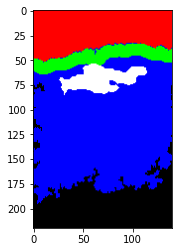

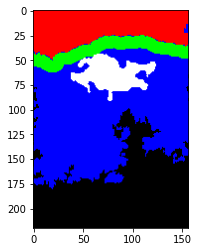

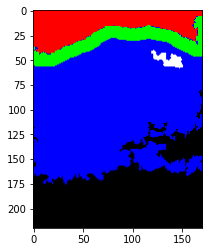

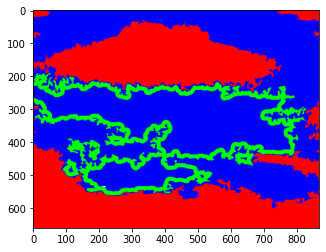

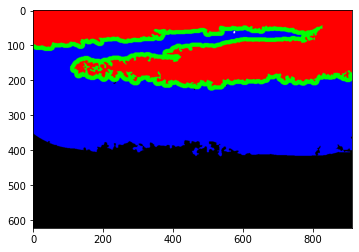

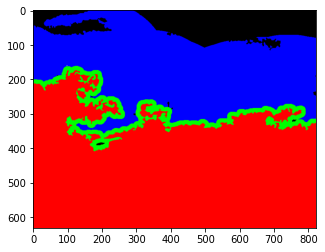

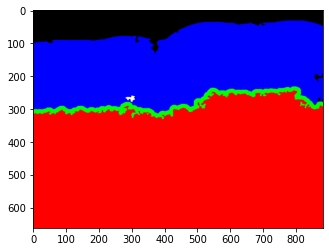

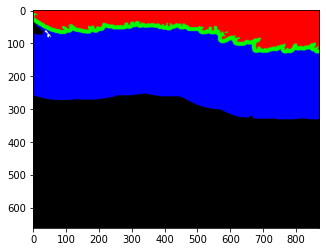

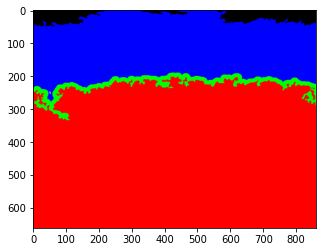

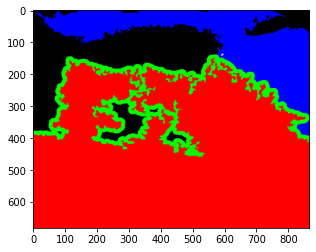

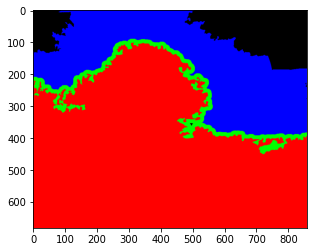

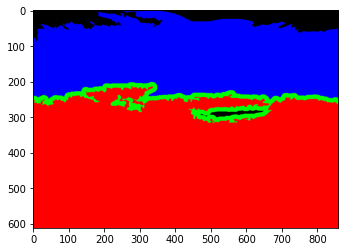

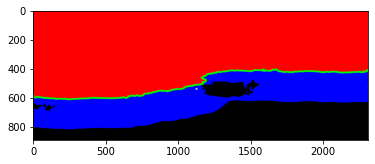

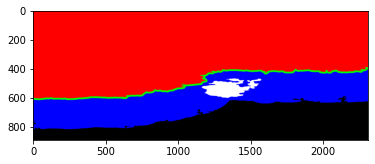

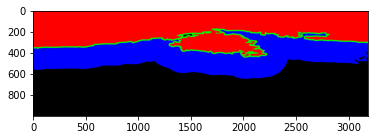

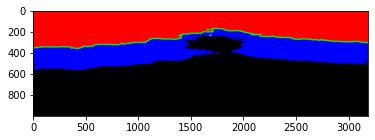

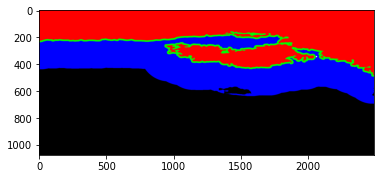

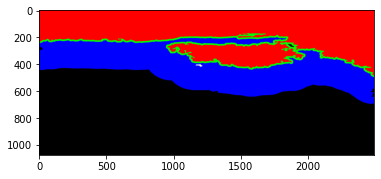

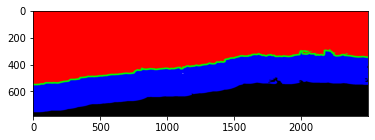

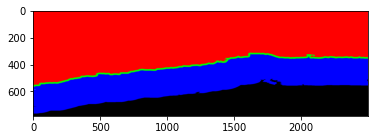

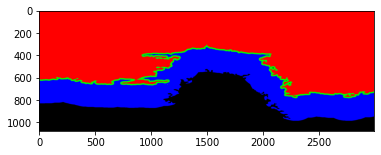

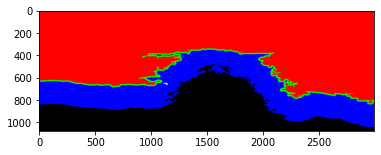

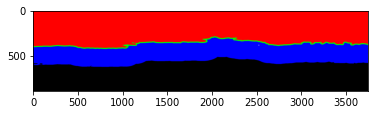

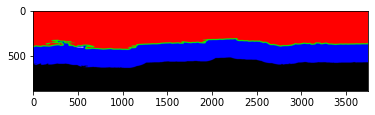

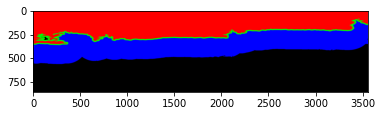

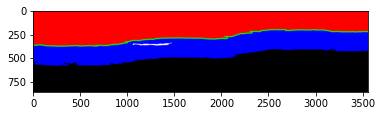

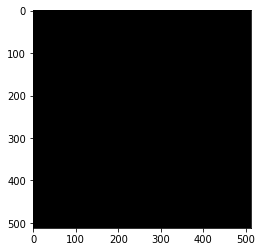

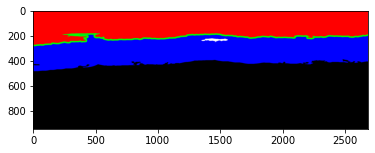

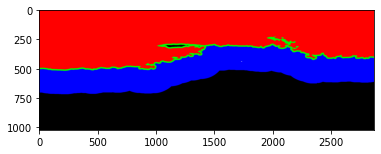

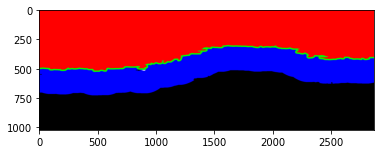

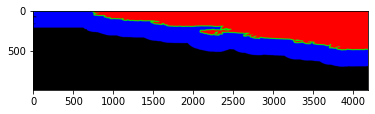

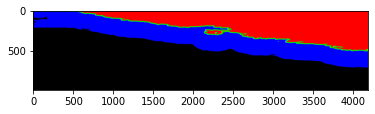

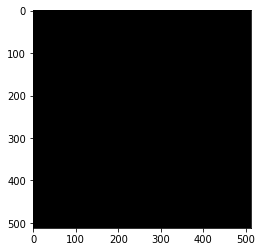

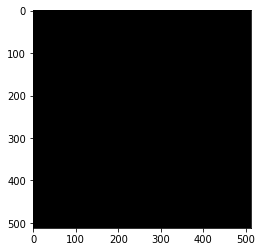

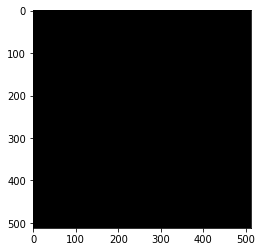

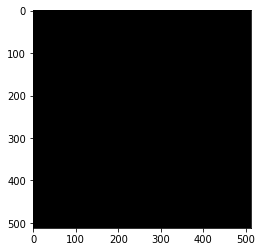

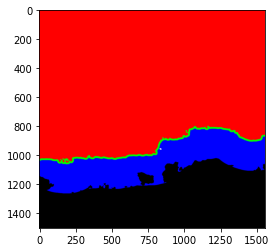

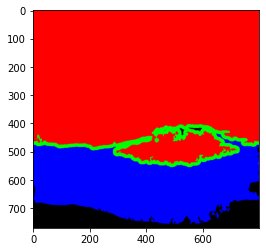

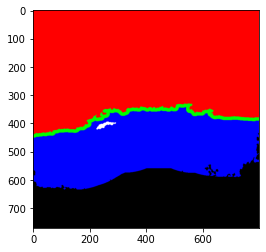

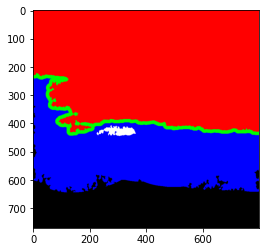

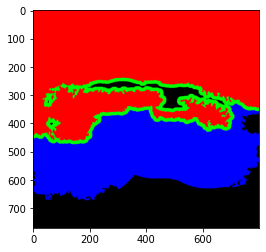

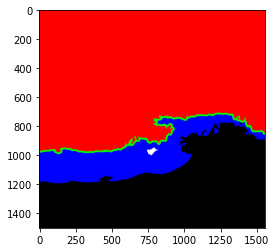

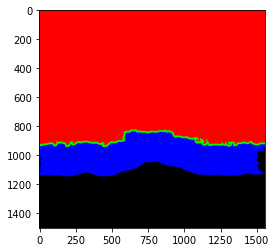

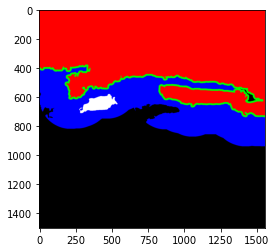

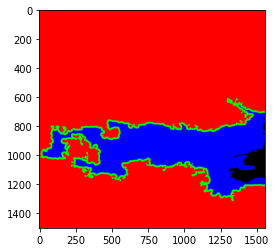

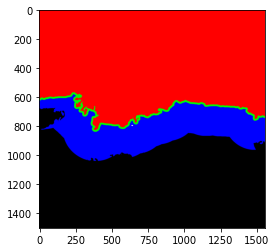

In [ ]:
#i=0
all_masks = os.listdir(input_dir)
input_img_name_list = os.listdir(main_folder)
input_img_name_list.sort()
for input_img_name in input_img_name_list:
  mask_names = [m for m in all_masks if m.startswith(input_img_name[0:-4]+'_mask_')]
  mask_names.sort()
  #print(mask_names)
  
  output_img = np.zeros((512,512,3),dtype='uint8') 
  for f in mask_names:
    mask_file = open(os.path.join(input_dir,f),'rb')
    mask = pickle.load(mask_file)
    mask_file.close()
    
    h,w = mask.shape
    if output_img.shape[0]!=h or output_img.shape[1]!=w:
      #output_img.resize((h,w,3))
      output_img = np.resize(output_img,(h,w,3))
      #print('resizing')
    idx = f.find('mask')
    mask_type = f[idx+5:]
    if mask_type=='skin':
      continue
    """
    plt.figure()
    plt.imshow(mask)
    plt.title(mask_type)
    plt.show()
    """
    color = classes.get(mask_type)
    #print(mask_type)
    for y in range(h):
      for x in range(w):
        if mask[y,x]:# and not output_img[y,x,:].any():
          output_img[y,x,:]=color
  plt.figure()
  plt.imshow(output_img)
  plt.show()
  output_img=cv2.cvtColor(output_img,cv2.COLOR_BGR2RGB)
  """
  if i==0:
    img_name = img_to_draw
  else:
    img_name = img_to_draw+'_style_transfer'
  """

  cv2.imwrite(os.path.join(output_dir,input_img_name),output_img)
  #i+=1
  